In [1]:
import datetime

import jpholiday
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
from matplotlib import mlab
from scipy import signal, stats
from sklearn import preprocessing
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.linear_model import LinearRegression

day_list_long = [
    "01",
    "02",
    "03",
    "04",
    "05",
    "06",
    "07",
    "08",
    "09",
    "10",
    "11",
    "12",
    "13",
    "14",
    "15",
    "16",
    "17",
    "18",
    "19",
    "20",
    "21",
    "22",
    "23",
    "24",
    "25",
    "26",
    "27",
    "28",
    "29",
    "30",
    "31",
]
day_list_short = [
    "01",
    "02",
    "03",
    "04",
    "05",
    "06",
    "07",
    "08",
    "09",
    "10",
    "11",
    "12",
    "13",
    "14",
    "15",
    "16",
    "17",
    "18",
    "19",
    "20",
    "21",
    "22",
    "23",
    "24",
    "25",
    "26",
    "27",
    "28",
    "29",
    "30",
]
day_list_Feb = [
    "01",
    "02",
    "03",
    "04",
    "05",
    "06",
    "07",
    "08",
    "09",
    "10",
    "11",
    "12",
    "13",
    "14",
    "15",
    "16",
    "17",
    "18",
    "19",
    "20",
    "21",
    "22",
    "23",
    "24",
    "25",
    "26",
    "27",
    "28",
]
hour_list = [
    "00",
    "01",
    "02",
    "03",
    "04",
    "05",
    "06",
    "07",
    "08",
    "09",
    "10",
    "11",
    "12",
    "13",
    "14",
    "15",
    "16",
    "17",
    "18",
    "19",
    "20",
    "21",
    "22",
    "23",
]
x_label = []
work_holi_Flag = []
for month in ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]:
    if month in ["01", "03", "05", "07", "08", "10", "12"]:
        day_list = day_list_long
    elif month == "02":
        day_list = day_list_Feb
    else:
        day_list = day_list_short
    for day in day_list:
        for hour in range(0, 24):
            hour = str(hour)
            key = int("22" + month + day + hour)
            key = str(key)
            x_label.append(key)
        Flag = int("2022" + month + day)
        Flag = str(Flag)
        work_holi_Flag.append(Flag)


Karasuma_mobile_PATH = "/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/mobile/numpy_array/Karasuma.npy"
Karasuma_tweets_PATH = "//home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/twitter/numpy_array/Karasuma.npy"

Touzi_tweets_PATH = "//home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/twitter/numpy_array/Touzi.npy"



def isBizDay(DATE):
    Date = datetime.date(int(DATE[0:4]), int(DATE[4:6]), int(DATE[6:8]))
    if Date.weekday() >= 5 or jpholiday.is_holiday(Date):
        return "Holiday"
    else:
        return "Workday"


list_Week_of_Day = []
for i in work_holi_Flag:
    if (
        i == "20210101"
        or i == "20210102"
        or i == "20210103"
        or i == "20211229"
        or i == "20211230"
        or i == "20211231"
    ):
        list_Week_of_Day.append("Holiday")
    else:
        list_Week_of_Day.append(isBizDay(i))


mobile = np.load(Karasuma_mobile_PATH)
tweets = np.load(Karasuma_tweets_PATH)


mobile = np.sum(mobile, axis=1)
tweets = np.sum(tweets, axis=1)

df = pd.DataFrame(
    data=np.stack([mobile, tweets, list_Week_of_Day]).T,
    columns=["The number of people", "The number of Tweets", "Week_of_Day"],
)
df["The number of Tweets"] = df["The number of Tweets"].astype(float)
df["The number of people"] = df["The number of people"].astype(float)

fig = plt.figure(figsize=(20, 25))





<Figure size 2000x2500 with 0 Axes>

/home/is/shuntaro-o/dev/compare_population_and_tweet_number/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/is/shuntaro-o/dev/compare_population_and_tweet_number/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


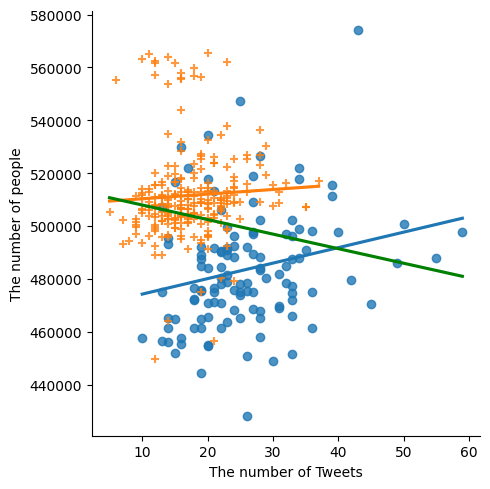

In [37]:
fig = sns.lmplot(
    x="The number of Tweets",
    y="The number of people",
    hue="Week_of_Day",
    data=df,
    ci=None,
    markers=["o", "+"],
    legend=False
    )

fig = sns.regplot(
    x="The number of Tweets",
    y="The number of people",
    data=df,
    ci=None,
    scatter=False,
    color='g'
)


df_work = df[df["Week_of_Day"] == "Workday"]
df_holi = df[df["Week_of_Day"] == "Holiday"]

X = df_work["The number of people"].to_numpy()
y = df_work["The number of Tweets"].to_numpy()
correlation_work, p_value_work = stats.pearsonr(X, y)

X = df_holi["The number of people"].to_numpy()
y = df_holi["The number of Tweets"].to_numpy()
correlation_holi, p_value_holi = stats.pearsonr(X, y)

# fig.set(
#     title="r_work={:.2f} r_holi={:.2f}\n p_work={:.2e} p_holi={:.2e}".format(
#         correlation_work, correlation_holi, p_value_work, p_value_holi
#     )
# )


# テキストを図の上に追加
# ax = plt.gca()
# ax.text(0.65, 0.9, 'social sensor performance on workday\n: {:.2f}\nsocial sensor performance on holiday\n: {:.2f}'.format(correlation_work,correlation_holi), transform=ax.transAxes,
#         fontsize=9, verticalalignment='top')
plt.show()

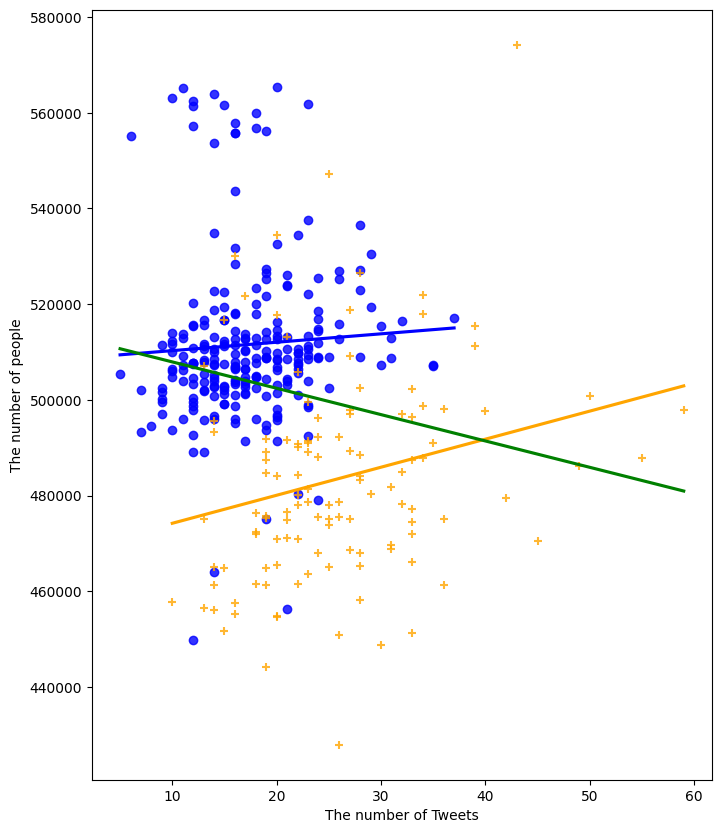

In [50]:
df_work = df[df["Week_of_Day"] == "Workday"]
df_holi = df[df["Week_of_Day"] == "Holiday"]
fig = plt.figure(figsize=(8, 10))
fig = sns.regplot(
    x="The number of Tweets",
    y="The number of people",
    data=df_work,
    ci=None,
    color='b'
)
fig = sns.regplot(
    x="The number of Tweets",
    y="The number of people",
    data=df_holi,
    ci=None,
    color='orange',
    marker='+'
)
fig = sns.regplot(
    x="The number of Tweets",
    y="The number of people",
    data=df,
    ci=None,
    scatter=False,
    color='g'
)

X = df_work["The number of people"].to_numpy()
y = df_work["The number of Tweets"].to_numpy()
correlation_work, p_value_work = stats.pearsonr(X, y)

X = df_holi["The number of people"].to_numpy()
y = df_holi["The number of Tweets"].to_numpy()
correlation_holi, p_value_holi = stats.pearsonr(X, y)

# fig.set(
#     title="r_work={:.2f} r_holi={:.2f}\n p_work={:.2e} p_holi={:.2e}".format(
#         correlation_work, correlation_holi, p_value_work, p_value_holi
#     )
# )


# テキストを図の上に追加
# ax = plt.gca()
# ax.text(0.65, 0.9, 'social sensor performance on workday\n: {:.2f}\nsocial sensor performance on holiday\n: {:.2f}'.format(correlation_work,correlation_holi), transform=ax.transAxes,
#         fontsize=9, verticalalignment='top')
plt.show()

In [58]:
print(sns.color_palette().as_hex())

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
